In [4]:
import sys
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage as ski
import PIL as PIL
import time

from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from scipy.ndimage import sobel
from PIL import Image


np.set_printoptions(threshold = 10000)

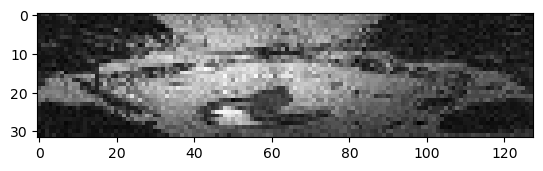

In [5]:
# Load the segmentation file “label_train00.npy” file. 

image = np.load(r"image_train00.npy")

plt.imshow(image[:, 127, :], cmap="gray")
plt.show()

In [6]:
# I have decided to use a Cartesian coordinate system, 
# Dimensions are measured in mm, with the intensity value for the voxel located at the centre of each voxel along
# each voxel.
# Numpy image data is provided in the form plane, row, column therefore I have decided to use the Cartesian 
# convention z,y,x throughout my code, with z being depth from superior to inferior, y being "column" values from
# anterior to posterior and x being "row" values from left to right

# Current voxel dimensions in mm
voxel_size_zyx = np.array([2.0, 0.5, 0.5])

# Physical size of image in each dimension (mm)
length_z = (image.shape[0])*(voxel_size_zyx[0])
length_y = (image.shape[1])*(voxel_size_zyx[1])
length_x = (image.shape[2])*(voxel_size_zyx[2])

# Create grid for original data
z_grid = np.arange(0, length_z, voxel_size_zyx[0])
y_grid = np.arange(0, length_y, voxel_size_zyx[1])
x_grid = np.arange(0, length_x, voxel_size_zyx[2])

# Create a regular meshgrid with coordinates at which the intensity values will be interpolated 
Z, Y, X = np.meshgrid([z_grid], [y_grid], [x_grid], indexing = "ij")

# Coordinates for the support points to which the known voxel intensity values are assigned:
support_points = ([z_grid, y_grid, x_grid])
coordinate_grid_restore = np.transpose(np.array([Z, Y, X]))

In [142]:
# New voxel dimensions in 1.0 x 1.0 x 1.0 mm
new_voxel_size_zyx_1 = np.array([1.0, 1.0, 1.0])

# Create grid for re-samling data
z_grid_1 = np.arange(0, length_z, new_voxel_size_zyx_1[0])
y_grid_1 =  np.arange(0, length_y, new_voxel_size_zyx_1[1])
x_grid_1 =  np.arange(0, length_x, new_voxel_size_zyx_1[2])

# Create a regular meshgrid with coordinates at which the intensity values will be interpolated 
Z_1, Y_1, X_1 = np.meshgrid([z_grid_1], [y_grid_1], [x_grid_1], indexing = "ij")
coordinate_grid_1 = np.transpose(np.array([Z_1, Y_1, X_1]))

In [153]:
def volume_resize(support_points, image, coordinate_grid):
    interpolated_image = []
    for point in coordinate_grid:
        int = sp.interpolate.interpn(support_points, image, point , method = "linear", bounds_error = False, fill_value = None)
        interpolated_image.append(int)
    return interpolated_image

In [156]:
interpolation_1 = volume_resize(support_points, image, coordinate_grid_1)
new_image_1 = np.transpose(np.array(interpolation))

# Create a new set of support points for interpolation of the new image
new_image_1_support_points = ([z_grid_1, y_grid_1, x_grid_1])

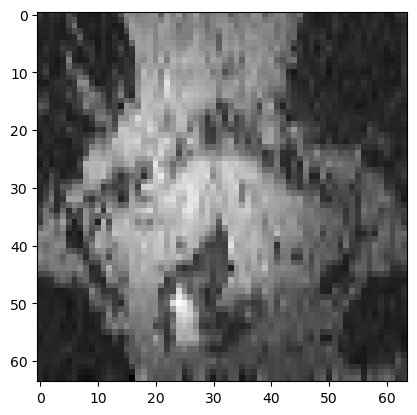

In [157]:
plt.imshow(new_image_1[:, 63, :], cmap="gray")
plt.show()

In [158]:
# New voxel dimensions 1.5 x 1.5 x 1.5 mm
new_voxel_size_zyx_1_5 = np.array([1.5, 1.5, 1.5])

# Create grid for re-samling data
z_grid_1_5 = np.arange(0, length_z, new_voxel_size_zyx_1_5[0])
y_grid_1_5 =  np.arange(0, length_y, new_voxel_size_zyx_1_5[1])
x_grid_1_5 =  np.arange(0, length_x, new_voxel_size_zyx_1_5[2])

# Create a regular meshgrid with coordinates at which the intensity values will be interpolated 
Z_1_5, Y_1_5, X_1_5 = np.meshgrid([z_grid_1_5], [y_grid_1_5], [x_grid_1_5], indexing = "ij")
coordinate_grid_1_5 = np.transpose(np.array([Z_new2, Y_new2, X_new2]))

# Create a new set of support points for interpolation of the new image
new_image_1_5_support_points = ([z_grid_1_5, y_grid_1_5, x_grid_1_5])

In [171]:
interpolation_1_5 = volume_resize(support_points, image, coordinate_grid_1_5)
new_image_1_5 = np.transpose(np.array(interpolation_1_5))

In [172]:
def image_derivatives_gauss(image, sigma):
# Apply 1d gaussian kernel along each dimension

    for k in range(image.shape[0]):
        z_image_dx = sp.ndimage.gaussian_filter1d(image, sigma[0], axis = 2, order = 1)
        z_image_dy = sp.ndimage.gaussian_filter1d(image, sigma[0], axis = 1, order = 1)
    
    for j in range(image.shape[1]):
         y_image_dx = sp.ndimage.gaussian_filter1d(image, sigma[1], axis = 2, order = 1)
         y_image_dz = sp.ndimage.gaussian_filter1d(image, sigma[1], axis = 0, order = 1)

    for i in range(image.shape[2]):
        x_image_dy = sp.ndimage.gaussian_filter1d(image, sigma[2], axis = 1, order = 1)
        x_image_dz = sp.ndimage.gaussian_filter1d(image, sigma[2], axis = 0, order = 1)

    return [z_image_dx, z_image_dy, y_image_dx, y_image_dz, x_image_dy, x_image_dz]
        

In [173]:
Gauss_1 = image_derivatives_gauss(new_image_1, new_voxel_size_zyx_1)

Gauss_1_z_dx = np.array(Gauss_1[0])
Gauss_1_z_dy = np.array(Gauss_1[1])

Gauss_1_y_dx = np.array(Gauss_1[2])
Gauss_1_y_dz = np.array(Gauss_1[3])

Gauss_1_x_dy = np.array(Gauss_1[4])
Gauss_1_x_dz = np.array(Gauss_1[5])

For each resized derivative image in Experiment 1, save 3 example axial/transverse slices to PNG files

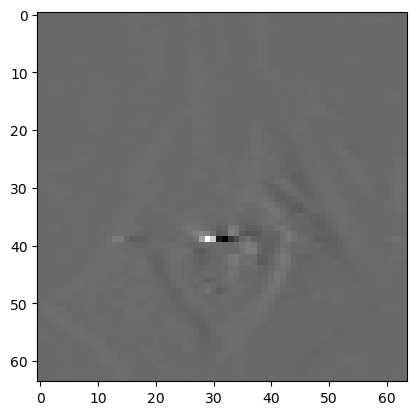

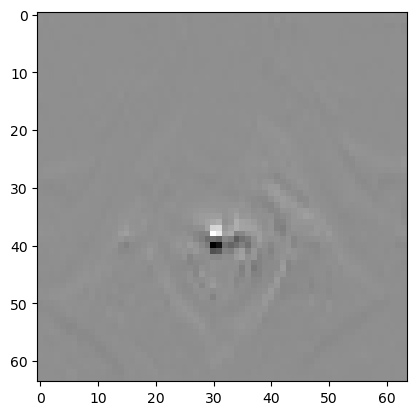

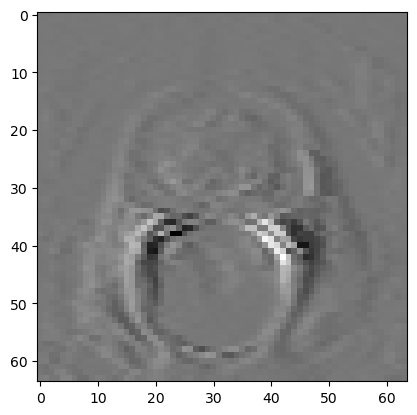

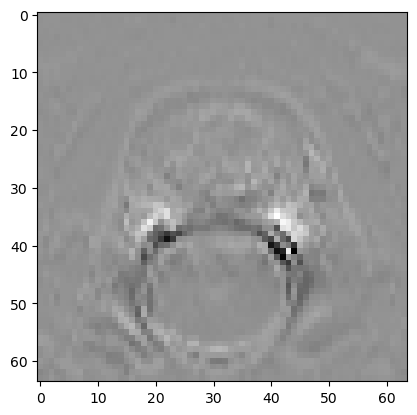

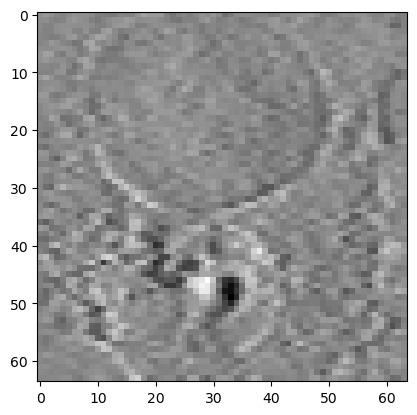

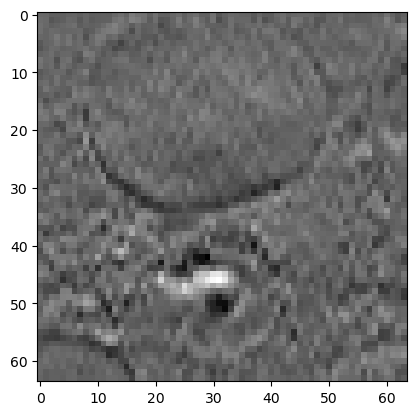

In [196]:
# I have saved 3 axial slices at the beginning (slice 1), middle (slice 32) and end (slice 63) of the volume in the 
# z-direction, in both the dx and dy derivative directions

axial_1_1_dx = plt.imshow(Gauss_1_z_dx[1, :, :], cmap="gray")
plt.savefig("exp1_size1.0_gauss_dx_slice1.png", format = "png")
plt.show()

axial_1_1_dy = plt.imshow(Gauss_1_z_dy[1, :, :], cmap="gray")
plt.savefig("exp1_size1.0_gauss_dy_slice1.png", format = "png")
plt.show()

axial_1_32_dx = plt.imshow(Gauss_1_z_dx[32, :, :], cmap="gray")
plt.savefig("exp1_size1.0_gauss_dx_slice32.png", format = "png")
plt.show()

axial_1_32_dy = plt.imshow(Gauss_1_z_dy[32, :, :], cmap="gray")
plt.savefig("exp1_size1.0_gauss_dy_slice32.png", format = "png")
plt.show()

axial_1_63_dx = plt.imshow(Gauss_1_z_dx[63, :, :], cmap="gray")
plt.savefig("exp1_size1.0_gauss_dx_slice63.png", format = "png")
plt.show()

axial_1_63_dy = plt.imshow(Gauss_1_z_dy[63, :, :], cmap="gray")
plt.savefig("exp1_size1.0_gauss_dy_slice63.png", format = "png")
plt.show()

In [175]:
Gauss_1_5 = image_derivatives_gauss(new_image_1_5, new_voxel_size_zyx_1_5)

Gauss_1_5_z_dx = np.array(Gauss_1_5[0])
Gauss_1_5_z_dy = np.array(Gauss_1_5[1])

Gauss_1_5_y_dx = np.array(Gauss_1_5[2])
Gauss_1_5_y_dz = np.array(Gauss_1_5[3])

Gauss_1_5_x_dy = np.array(Gauss_1_5[4])
Gauss_1_5_x_dz = np.array(Gauss_1_5[5])

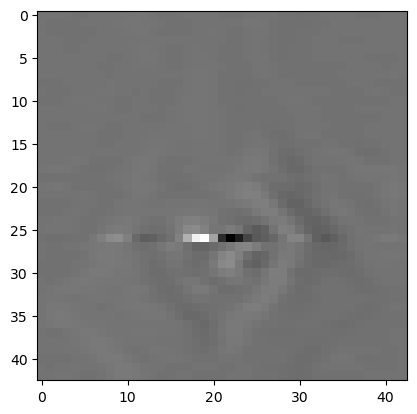

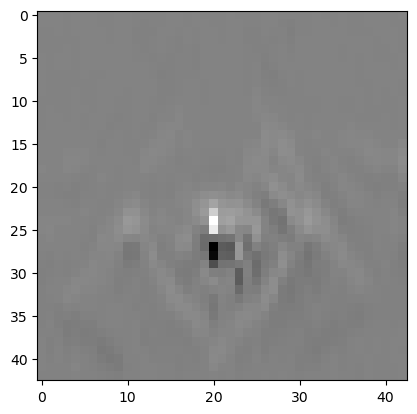

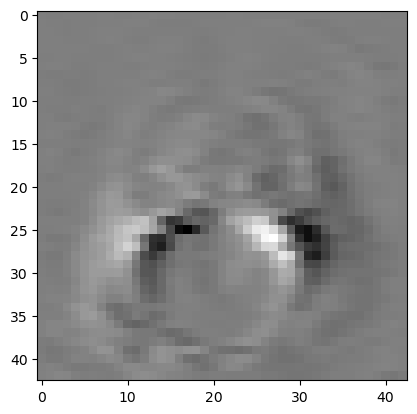

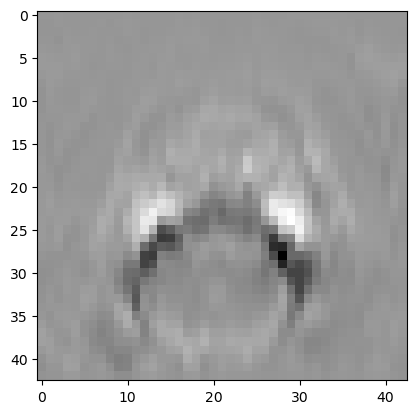

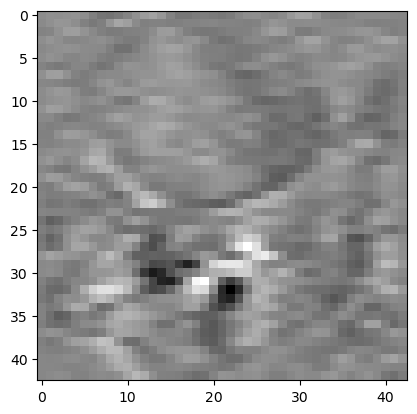

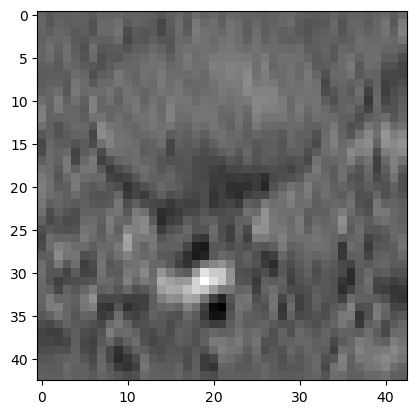

In [197]:
# I have saved 3 axial slices at the beginning (slice 1), middle (slice 21) and end (slice 42) of the volume 

axial_1_5_1_dx = plt.imshow(Gauss_1_5_z_dx[1, :, :], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dx_slice1.png", format = "png")
plt.show()

axial_1_5_1_dy = plt.imshow(Gauss_1_5_z_dy[1, :, :], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dy_slice1.png", format = "png")
plt.show()

axial_1_5_21_dx = plt.imshow(Gauss_1_5_z_dx[21, :, :], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dx_slice21.png", format = "png")
plt.show()

axial_1_5_21_dy = plt.imshow(Gauss_1_5_z_dy[21, :, :], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dy_slice21.png", format = "png")
plt.show()

axial_1_5_42_dx = plt.imshow(Gauss_1_5_z_dx[42, :, :], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dx_slice42.png", format = "png")
plt.show()

axial_1_5_42_dy = plt.imshow(Gauss_1_5_z_dy[42, :, :], cmap="gray")
plt.savefig("exp1_size1.5_gauss_dy_slice42.png", format = "png")
plt.show()

Resize these derivative images back to the original image size of 2.0×2.0×0.5 mm3/voxel, using the volume_resize function.

In [187]:
# I have restored the filtered images to their original pixel size, in three dimensions, for each of the x- and
# y-derivative directions

# Restore the 1.0 x 1.0 x 1.0 mm images:

Gauss_1_z_dx_interpolation = volume_resize(new_image_1_support_points, Gauss_1_z_dx, coordinate_grid_restore)
Gauss_1_z_dx_restore = np.transpose(np.array(Gauss_1_z_dx_interpolation))

Gauss_1_z_dy_interpolation = volume_resize(new_image_1_support_points, Gauss_1_z_dy, coordinate_grid_restore)
Gauss_1_z_dy_restore = np.transpose(np.array(Gauss_1_z_dy_interpolation))

Gauss_1_y_dx_interpolation = volume_resize(new_image_1_support_points, Gauss_1_y_dx, coordinate_grid_restore)
Gauss_1_y_dx_restore = np.transpose(np.array(Gauss_1_y_dx_interpolation))

Gauss_1_y_dz_interpolation = volume_resize(new_image_1_support_points, Gauss_1_y_dz, coordinate_grid_restore)
Gauss_1_y_dz_restore = np.transpose(np.array(Gauss_1_y_dz_interpolation))

Gauss_1_x_dy_interpolation = volume_resize(new_image_1_support_points, Gauss_1_x_dy, coordinate_grid_restore)
Gauss_1_x_dy_restore = np.transpose(np.array(Gauss_1_x_dy_interpolation))

Gauss_1_x_dz_interpolation = volume_resize(new_image_1_support_points, Gauss_1_x_dz, coordinate_grid_restore)
Gauss_1_x_dz_restore = np.transpose(np.array(Gauss_1_x_dz_interpolation))

In [188]:
# Restore the 1.5 x 1.5 x 1.5 mm images:

Gauss_1_5_z_dx_interpolation = volume_resize(new_image_1_5_support_points, Gauss_1_5_z_dx, coordinate_grid_restore)
Gauss_1_5_z_dx_restore = np.transpose(np.array(Gauss_1_5_z_dx_interpolation))

Gauss_1_5_z_dy_interpolation = volume_resize(new_image_1_5_support_points, Gauss_1_5_z_dy, coordinate_grid_restore)
Gauss_1_5_z_dy_restore = np.transpose(np.array(Gauss_1_5_z_dy_interpolation))

Gauss_1_5_y_dx_interpolation = volume_resize(new_image_1_5_support_points, Gauss_1_5_y_dx, coordinate_grid_restore)
Gauss_1_5_y_dx_restore = np.transpose(np.array(Gauss_1_5_y_dx_interpolation))

Gauss_1_5_y_dz_interpolation = volume_resize(new_image_1_5_support_points, Gauss_1_5_y_dz, coordinate_grid_restore)
Gauss_1_5_y_dz_restore = np.transpose(np.array(Gauss_1_5_y_dz_interpolation))

Gauss_1_5_x_dy_interpolation = volume_resize(new_image_1_5_support_points, Gauss_1_5_x_dy, coordinate_grid_restore)
Gauss_1_5_x_dy_restore = np.transpose(np.array(Gauss_1_5_x_dy_interpolation))

Gauss_1_5_x_dz_interpolation = volume_resize(new_image_1_5_support_points, Gauss_1_5_x_dz, coordinate_grid_restore)
Gauss_1_5_x_dz_restore = np.transpose(np.array(Gauss_1_5_x_dz_interpolation))

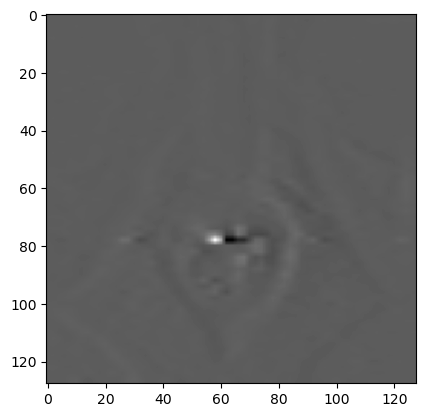

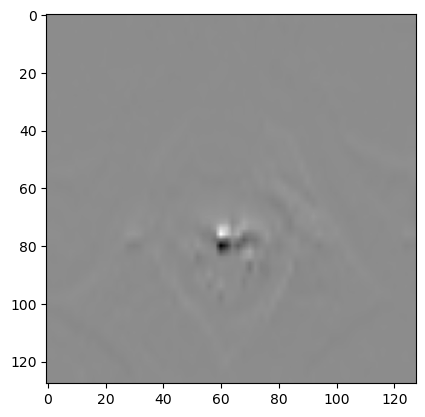

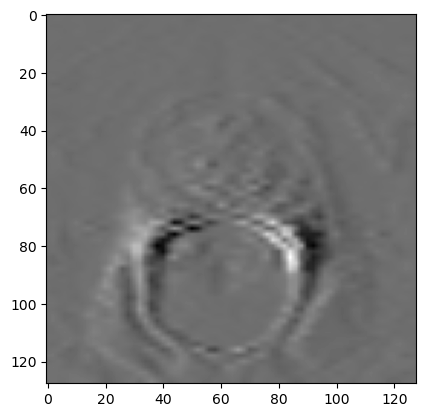

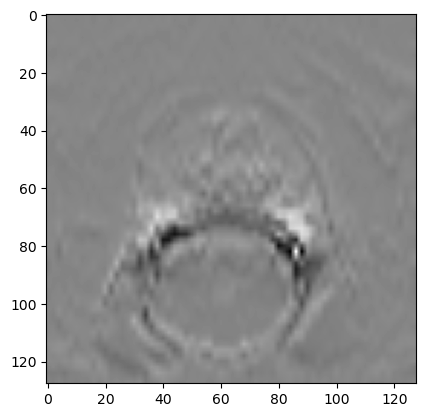

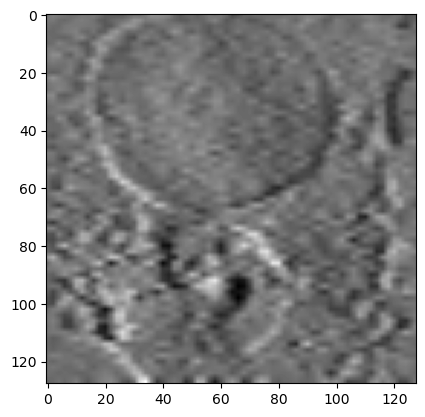

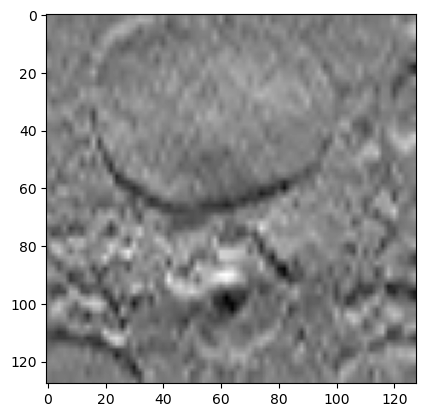

In [199]:
# I have saved 3 axial slices at the beginning (slice 1), middle (slice 15) and end (slice 31) of the volume 

# Resize the 1.0 x 1.0 x 1.0 mm images:

axial_1_1_dx_restore = plt.imshow(Gauss_1_z_dx_restore[1, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.0)_gauss_dx_slice1.png", format = "png")
plt.show()

axial_1_1_dy_restore = plt.imshow(Gauss_1_z_dy_restore[1, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.0)_gauss_dy_slice1.png", format = "png")
plt.show()

axial_1_15_dx_restore = plt.imshow(Gauss_1_z_dx_restore[15, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.0)_gauss_dx_slice15.png", format = "png")
plt.show()

axial_1_15_dy_restore = plt.imshow(Gauss_1_z_dy_restore[15, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.0)_gauss_dy_slice15.png", format = "png")
plt.show()

axial_1_31_dx_restore = plt.imshow(Gauss_1_z_dx_restore[31, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.0)_gauss_dx_slice31.png", format = "png")
plt.show()

axial_1_31_dy_restore = plt.imshow(Gauss_1_z_dy_restore[31, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.0)_gauss_dy_slice31.png", format = "png")
plt.show()

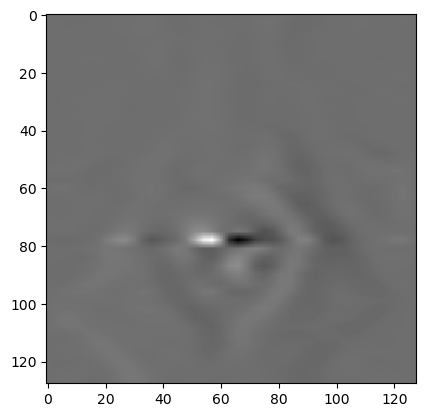

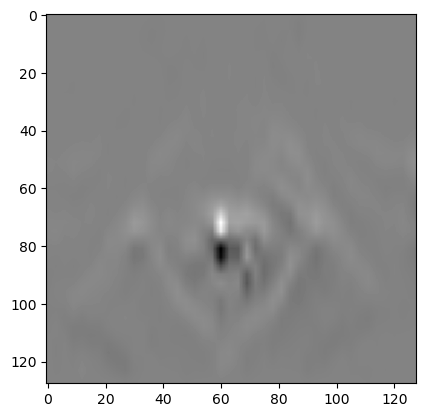

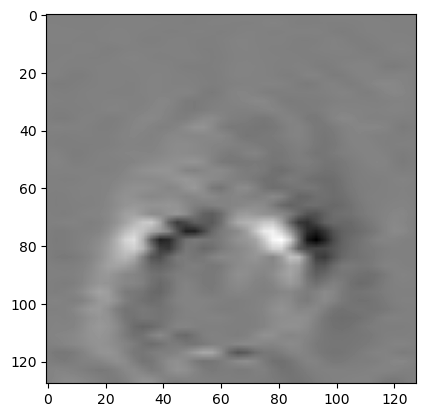

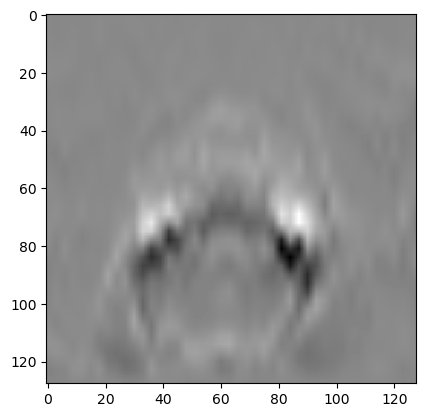

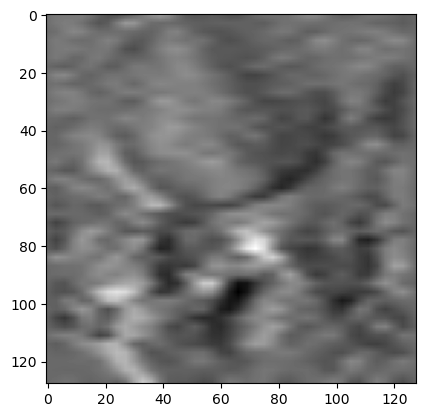

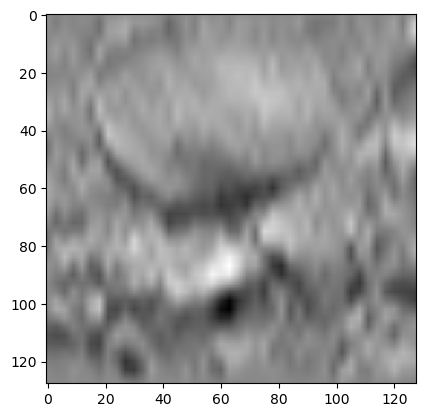

In [198]:
# Resize the 1.5 x 1.5 x 1.5 mm images:

axial_1_5_1_dx_restore = plt.imshow(Gauss_1_5_z_dx_restore[1, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.5)_gauss_dx_slice1.png", format = "png")
plt.show()

axial_1_5_1_dy_restore = plt.imshow(Gauss_1_5_z_dy_restore[1, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.5)_gauss_dy_slice1.png", format = "png")
plt.show()

axial_1_5_15_dx_restore = plt.imshow(Gauss_1_5_z_dx_restore[15, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.5)_gauss_dx_slice15.png", format = "png")
plt.show()

axial_1_5_15_dy_restore = plt.imshow(Gauss_1_5_z_dy_restore[15, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.5)_gauss_dy_slice15.png", format = "png")
plt.show()

axial_1_5_31_dx_restore = plt.imshow(Gauss_1_5_z_dx_restore[31, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.5)_gauss_dx_slice31.png", format = "png")
plt.show()

axial_1_5_31_dy_restore = plt.imshow(Gauss_1_5_z_dy_restore[31, :, :], cmap="gray")
plt.savefig("exp1_original_size(1.5)_gauss_dy_slice31.png", format = "png")
plt.show()